In [9]:
import os
os.chdir('C:\MyBigData\datasets\housing')

In [10]:
import pandas as pd
import numpy as np
# Load the data 데이터 적재
housing = pd.read_csv("housing.csv", thousands=',')
print(housing)
housing.head()

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
7        -122.25     37.84                52.0       3104.0           687.0   
8        -122.26     37.84                42.0       2555.0           665.0   
9        -122.25     37.84                52.0       3549.0           707.0   
10       -122.26     37.85                52.0       2202.0           434.0   
11       -122.26     37.85                52.0      

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


중간 소득이 중간 주택 가격 예측
중간 소득의 계층을 1.5 로 나눈다
각각의 계층에 충분한 샘플수가 있어야 계층의 중요도를 찾는데 편향이 없을 것임
0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
5        3.0
6        3.0
7        3.0
8        2.0
9        3.0
10       3.0
11       3.0
12       3.0
13       2.0
14       2.0
15       2.0
16       2.0
17       2.0
18       2.0
19       2.0
20       1.0
21       2.0
22       2.0
23       2.0
24       2.0
25       2.0
26       2.0
27       2.0
28       2.0
29       2.0
        ... 
20610    1.0
20611    1.0
20612    1.0
20613    1.0
20614    2.0
20615    2.0
20616    2.0
20617    3.0
20618    2.0
20619    2.0
20620    4.0
20621    2.0
20622    2.0
20623    2.0
20624    3.0
20625    3.0
20626    2.0
20627    2.0
20628    2.0
20629    2.0
20630    3.0
20631    3.0
20632    3.0
20633    2.0
20634    3.0
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64


3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

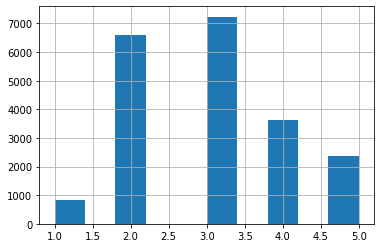

In [11]:
# 사이킷런으로 테스트 세트 만드는것 
# 데이터 편향 주의 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

test_set.head()

# housing["median_income"].hist()

print("중간 소득이 중간 주택 가격 예측")  
print("중간 소득의 계층을 1.5 로 나눈다") 
print("각각의 계층에 충분한 샘플수가 있어야 계층의 중요도를 찾는데 편향이 없을 것임")

housing["income_cat"] = np.ceil(housing["median_income"] / 1.5 )
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True )
print(housing["income_cat"])
# 소득 카테고리 히스토그램
housing["income_cat"].hist()

# 계층 셈플링 StraitifiedKFOLD 와 ShuffleSplit 의 랜덤 샘플링의 합성 매게변수 합 1이하로 지정 가능 
from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# 전체 주택데이터 셋에서 소득 카테고리 비율 
housing["income_cat"].value_counts() / len(housing)

In [41]:
# 훈련 세트 전부 사용 
housing = strat_train_set.copy()


In [48]:
# 폰트 적용
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
path = 'C:\Windows\Fonts\H2GSRB.TTF'
font_name = font_manager.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

HYGungSo-Bold


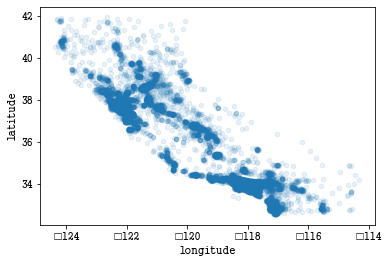

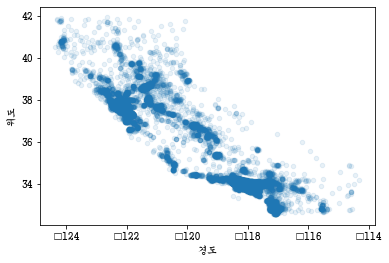

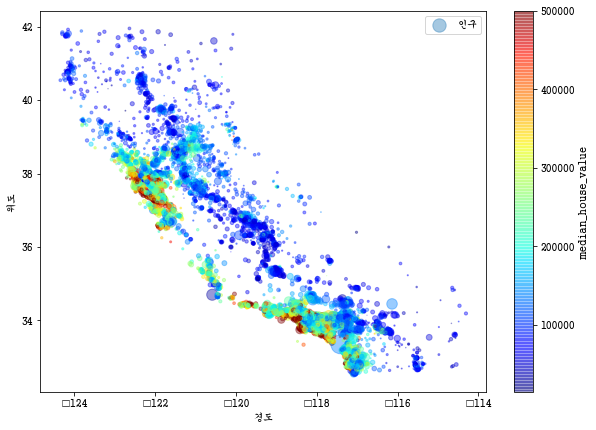

In [49]:
# 데이터 지리적 산점도 패턴 찾기 쉽게 alpha 옵션 사용
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

# 이름 지정 해줌 
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
ax.set(xlabel='경도', ylabel='위도')

ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="인구", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
ax.set(xlabel='경도', ylabel='위도')
plt.legend()